## Library Importation

In [1]:
##import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import figure
plt.style.use('ggplot')
%matplotlib inline 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.set_option("Display.max_rows",None)

## Data Loading

In [2]:
##load data
df=pd.read_csv(r"C:\Users\User\Downloads\movies\movies.csv")

In [3]:
##view data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Check for Missing Value

In [4]:
###check the percentage of missing values
for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    print("{} - {:.2%}".format(col,percent_missing))

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


## Replace Gross and budget missing values

In [5]:
###for the missing values in budget and gross we will replace it with 0
df["budget"].fillna(0,inplace=True)
df["gross"].fillna(0,inplace=True)

In [6]:
##check for missing values in budget and gross to confirm changes
df["budget"].isnull().sum(),df["gross"].isnull().sum()


(0, 0)

## Check datatypes


In [7]:
##checking datatypes
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Change budget and gross datatype

In [8]:
df["budget"]=df["budget"].astype("int64")
df["gross"]=df["gross"].astype("int64")

## View Year  and released Column

In [9]:
##put columns in a list
selected_columns = ['year', 'released']

# Create a new DataFrame with only the selected columns
df_selected = df[selected_columns]

In [10]:
# Display the new DataFrame
df_selected.head(10)


,year,released
0,1980,"June 13, 1980 (United States)"
1,1980,"July 2, 1980 (United States)"
2,1980,"June 20, 1980 (United States)"
3,1980,"July 2, 1980 (United States)"
4,1980,"July 25, 1980 (United States)"
5,1980,"May 9, 1980 (United States)"
6,1980,"June 20, 1980 (United States)"
7,1980,"December 19, 1980 (United States)"
8,1980,"June 19, 1981 (United States)"
9,1980,"May 16, 1980 (United States)"


## Observation
- The released column released has a year which represents the released year same as the column year but i realised the year column has some date mismatches to the released year so we will correct them

## Extracting Correct Year from released column


In [11]:
##extracting year
df["correct_year"]=df["released"].str.split(", ").str[1].str.split(" ").str[0]

In [12]:
##view new column
df["correct_year"]

0       1980
1       1980
2       1980
3       1980
4       1980
5       1980
6       1980
7       1980
8       1981
9       1980
10      1980
11      1984
12      1980
13      1980
14      1980
15      1980
16      1980
17      1980
18      1980
19      1980
20      1980
21      1981
22      1980
23      1980
24      1980
25      1980
26      1980
27      1980
28      1980
29      1980
30      1980
31      1980
32      1980
33      1981
34      1980
35      1980
36      1980
37      1980
38      1980
39      1980
40      1981
41      1980
42      1980
43      1980
44      1980
45      1980
46      1980
47      1980
48      1980
49      1981
50      1980
51      1980
52      1980
53      1980
54      1981
55      1980
56      1980
57      1980
58      1980
59      1981
60      1980
61      1980
62      1981
63      1980
64      1980
65      1980
66      1980
67      1980
68      1980
69      1980
70      1980
71      1980
72      1980
73      1980
74      1980
75      1980
76      1980

In [13]:
## remove the main year column
df.drop(columns="year",inplace=True)

In [14]:
##we will rename the correct_year column to year 
df.rename(columns={"correct_year":"Year"},inplace=True)

In [15]:
##view dataframe to check columns
df.columns

Index(['name', 'rating', 'genre', 'released', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime',
       'Year'],
      dtype='object')

## Exploring the Data

### Check for outliers

<Axes: >

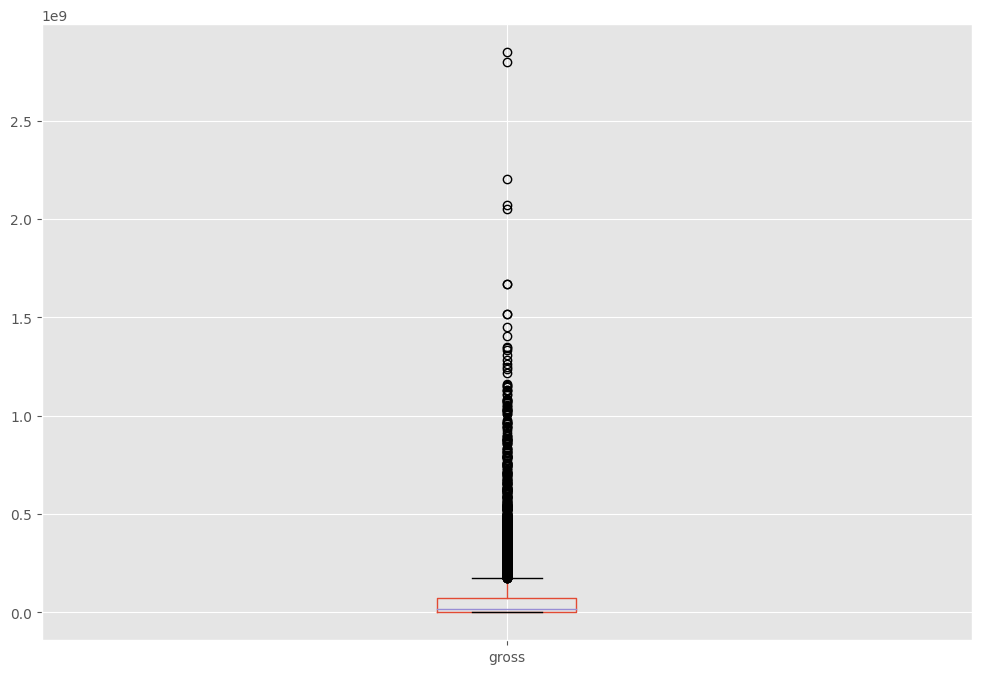

In [16]:
##check for outliers
df.boxplot(column=["gross"])

<Axes: >

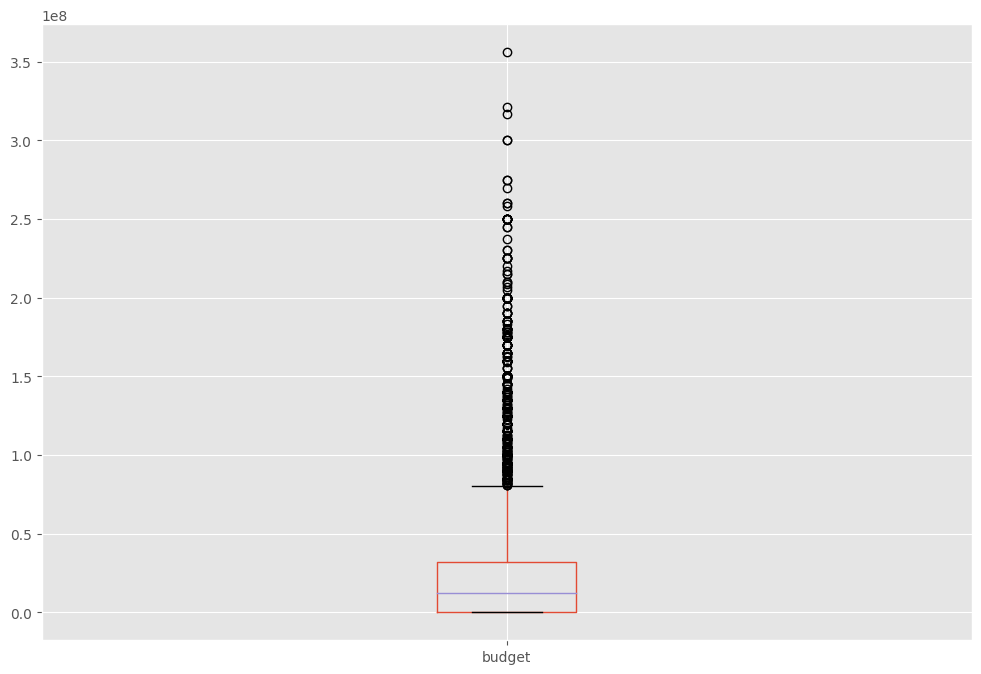

In [17]:
df.boxplot(column="budget")

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,7665.0,6.390411e+00,9.688416e-01,1.9,5.80,6.5,7.1,9.300000e+00
votes,7665.0,8.810850e+04,1.633238e+05,7.0,9100.00,33000.0,93000.0,2.400000e+06
budget,7668.0,2.551350e+07,3.858954e+07,0.0,0.00,12000000.0,32000000.0,3.560000e+08
gross,7668.0,7.656567e+07,1.641217e+08,0.0,3860581.75,18955434.5,72620218.5,2.847246e+09
runtime,7664.0,1.072616e+02,1.858125e+01,55.0,95.00,104.0,116.0,3.660000e+02


## Check Correlation Between gross and Budget


<Axes: xlabel='gross', ylabel='budget'>

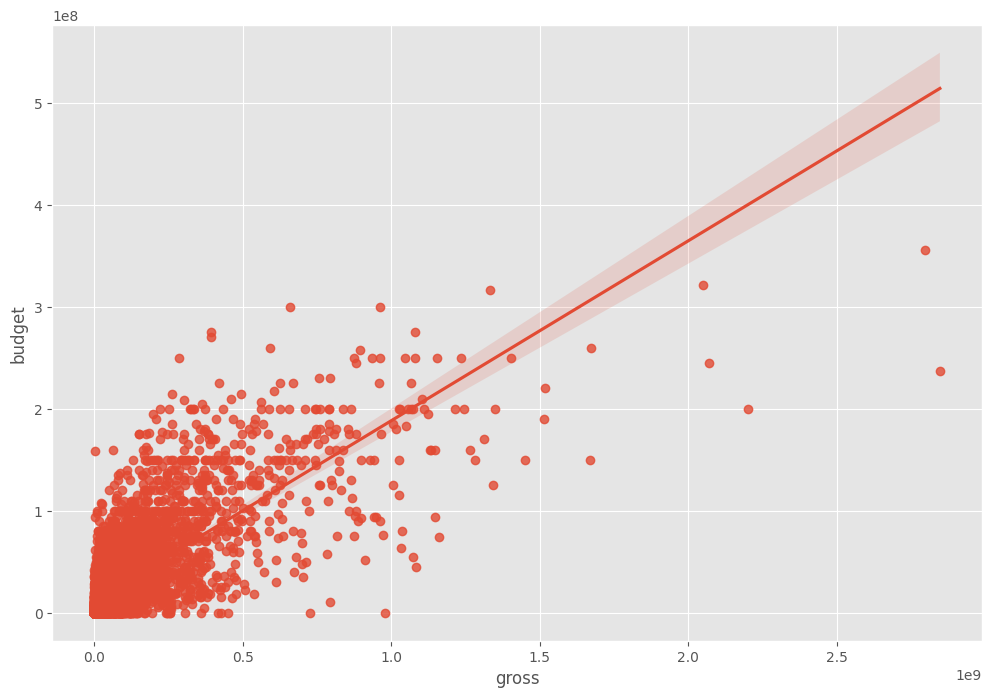

In [19]:
sns.regplot(data=df,x="gross",y="budget")

Text(0, 0.5, 'Budget')

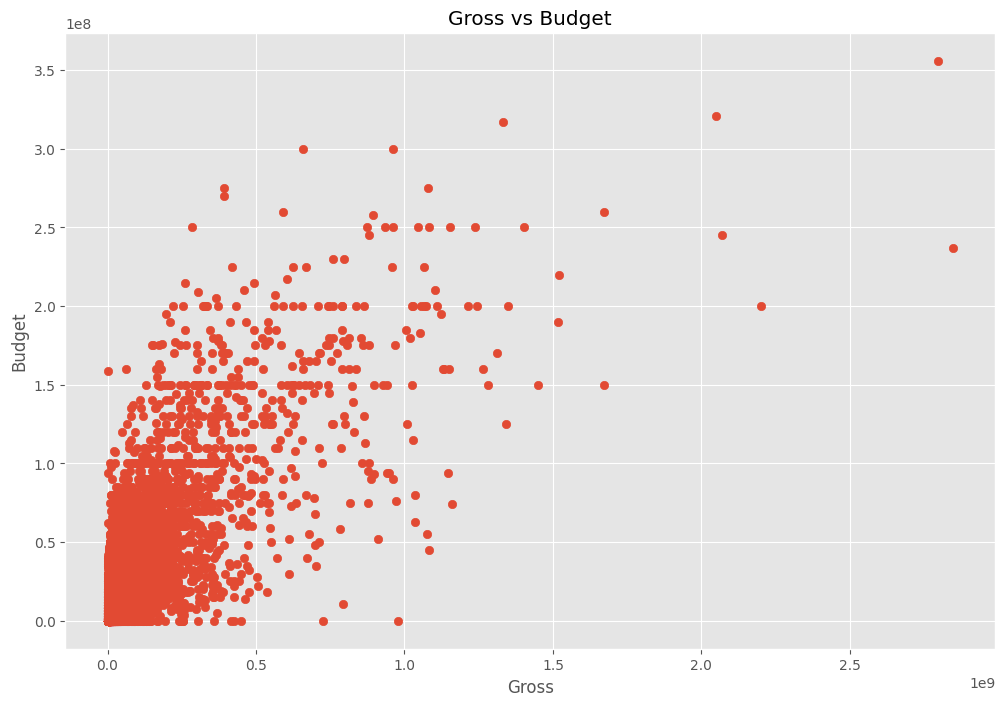

In [20]:
##correlation using scatter plot
plt.scatter(data=df,x="gross",y="budget")
plt.title("Gross vs Budget")
plt.xlabel("Gross")
plt.ylabel("Budget")

## Check Correlation from numeric values

In [21]:
df.corr(numeric_only=True)

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.399451,0.309212,0.269510,0.245235,1.000000


<Axes: >

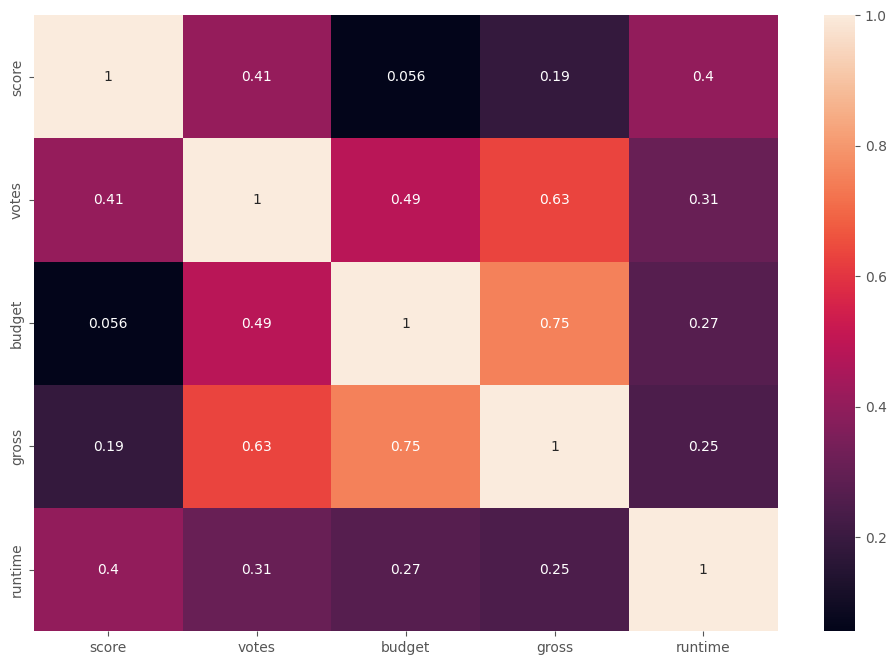

In [22]:
##show this on a heatmap
correlation_matrix=df.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)

## Check correlation for whole dataset

### convert categorical columnns to numeric

In [23]:
##To check the correlation of the whole data,we will have to convert the categorical columns to numeric

df_nummerized=df

for col_name in df.columns:
    if(df_nummerized[col_name].dtype=="object"):
        df_nummerized[col_name]=df_nummerized[col_name].astype("category")
        df_nummerized[col_name]=df_nummerized[col_name].cat.codes


In [24]:
#view data
df_nummerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,6587,6,6,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


In [25]:
##check correlation on whole data
df_nummerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.008069,0.016355,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.009553
rating,-0.008069,1.000000,0.072423,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.004829
genre,0.016355,0.072423,1.000000,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.082070
released,-0.011311,0.016613,0.029822,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.001653
score,0.017097,-0.001314,0.027965,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.105341
votes,0.013088,0.033225,-0.145307,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.219954
director,0.009079,0.019483,-0.015258,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.018620
writer,0.009081,-0.005921,0.006567,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.006134
star,0.006472,0.013405,-0.005477,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.025288
country,-0.010737,0.081244,-0.037615,-0.020427,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.131720,0.095325,0.095548,-0.078412,-0.074166


<Axes: >

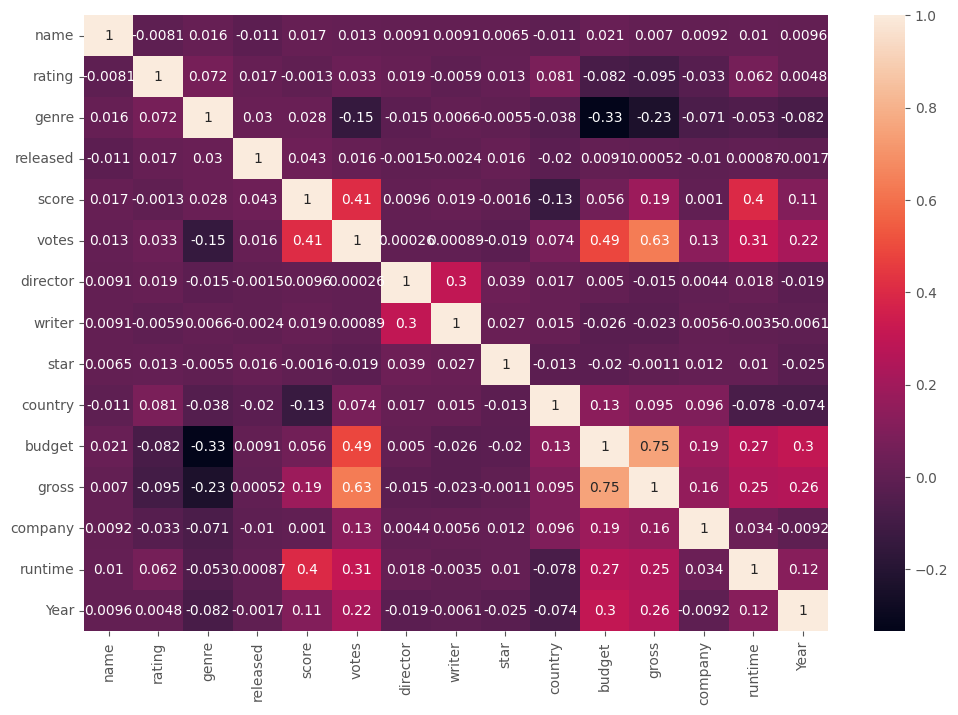

In [26]:
##put the whole data in a heatmap
corr_matrix=df_nummerized.corr()

sns.heatmap(corr_matrix,annot=True)

In [27]:
##we want to view the correlated data set in a different way
corr_unstack=df_nummerized.corr()

correlation_pairs=corr_unstack.unstack()

correlation_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020548
          gross       0.006989
          company     0.009211
          runtime     0.010392
          Year        0.009553
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.095450
          company    -0.032943
          runtime     0.062145
          Year        0.004829
genre     name        0.016355
          rating      0.072423
        

In [29]:
##let's sort the correlation
sorted_pairs=correlation_pairs.sort_values()

sorted_pairs

genre     budget     -0.334021
budget    genre      -0.334021
gross     genre      -0.234297
genre     gross      -0.234297
votes     genre      -0.145307
genre     votes      -0.145307
country   score      -0.133348
score     country    -0.133348
gross     rating     -0.095450
rating    gross      -0.095450
Year      genre      -0.082070
genre     Year       -0.082070
budget    rating     -0.081939
rating    budget     -0.081939
runtime   country    -0.078412
country   runtime    -0.078412
          Year       -0.074166
Year      country    -0.074166
genre     company    -0.071067
company   genre      -0.071067
genre     runtime    -0.052711
runtime   genre      -0.052711
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
writer    budget     -0.025911
budget    writer     -0.025911
star      Year       -0.025288
Year      star       -0.025288
gross     writer     -0.022997
writer    gross      -0.022997
country 

In [31]:
##we want to view the correlations with the highest
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes     gross       0.632834
gross     votes       0.632834
          budget      0.750157
budget    gross       0.750157
name      name        1.000000
writer    writer      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
Year      Year        1.000000
dtype: float64

After carefully exploring the data with all the variables, we can conclude that votes and budget jave a high correlation on gross revenue